El objetivo de esta segunda entrega es hacer enfasis en el analisis de los datos crudos y un EDA (Analisis de Datos Exploratorios) sobre la data que se logro extraer de la API de yahoo finance referida a los precios de cierre de las acciones denominadas las 7 Magnificas a lo largo de los ultimos 10 años. Una vez analizados los datos obtenidos y corregidos (de ser necesario) obtendremos algunos Insights y finalmente se procede a subirr los datos a una tabla en la base de datos de Amazon.

In [1]:
#pip install yfinance

#Importo Bibliotecas Basicas
import pandas as pd
import numpy as np
#importar yfinance (Previa instalacion de la API: pip install yfinance) para tener datos de mercado financiero
import yfinance as yf
#Importar librerias de Visualizacion
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


# 1) Obtengo los registros de la API

In [2]:
#1.1) Creo una lista en la que incluyo los tickers de las Acciones denominadas 7 Maginifcas
tickers = ['MSFT','GOOG','AAPL','AMZN', 'META', 'TSLA', 'NVDA']

# Descargo el precio de Cierre de las Acciones antes mencionada
data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, period="10Y", interval="1d")['Close']

# Creo DataFrame 
df = pd.DataFrame(data
                  )
#Imprimo el DataFrame
print(df)
print(df.columns)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                  MSFT        GOOG        AAPL        AMZN        META  \
Date                                                                     
2014-05-19   39.750000   26.370600   21.592501   14.838000   59.209999   
2014-05-20   39.680000   26.415976   21.596786   15.059500   58.560001   
2014-05-21   40.349998   26.873220   21.653929   15.250500   60.490002   
2014-05-22   40.099998   27.178383   21.688213   15.245500   60.520000   
2014-05-23   40.119999   27.559336   21.933214   15.612000   61.349998   
...                ...         ...         ...         ...         ...   
2024-05-10  414.739990  170.289993  183.050003  187.479996  476.200012   
2024-05-13  413.720001  170.899994  186.279999  186.570007  468.010010   
2024-05-14  416.559998  171.929993  187.429993  187.070007  471.850006   
2024-05-15  423.079987  173.880005  189.720001  185.990005  481.540009   
2024-05-16  420.989990  175.429993  189.839996  183.630005  473.230011   

                  TSLA        NVDA  


In [3]:
# Mover el índice a la primera columna y reorganizar las columnas
df.reset_index(inplace=True)  # Reiniciar el índice y mover Date a una columna
df = df[['Date', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'META', 'TSLA', 'NVDA']]  # Reorganizar las columnas según sea necesario
df['Date'] = pd.to_datetime(df['Date'])  # Convertir la columna Date a tipo datetime

#Imprimo el DataFrame, sus columnas y tipos de datos contenidos en las mismas
print(df)
print(df.columns)
print(df.dtypes)

           Date        MSFT        GOOG        AAPL        AMZN        META  \
0    2014-05-19   39.750000   26.370600   21.592501   14.838000   59.209999   
1    2014-05-20   39.680000   26.415976   21.596786   15.059500   58.560001   
2    2014-05-21   40.349998   26.873220   21.653929   15.250500   60.490002   
3    2014-05-22   40.099998   27.178383   21.688213   15.245500   60.520000   
4    2014-05-23   40.119999   27.559336   21.933214   15.612000   61.349998   
...         ...         ...         ...         ...         ...         ...   
2512 2024-05-10  414.739990  170.289993  183.050003  187.479996  476.200012   
2513 2024-05-13  413.720001  170.899994  186.279999  186.570007  468.010010   
2514 2024-05-14  416.559998  171.929993  187.429993  187.070007  471.850006   
2515 2024-05-15  423.079987  173.880005  189.720001  185.990005  481.540009   
2516 2024-05-16  420.989990  175.429993  189.839996  183.630005  473.230011   

            TSLA        NVDA  
0      13.072667    

# 2) EDA y Data Wrangling

## Analisis a nivel df

In [4]:
#Cantidad de Filas y Columnas del df
df.shape

(2517, 8)

In [5]:
# Informacion sobre el tipo de columna y si existen nulos en las mismas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2517 non-null   datetime64[ns]
 1   MSFT    2517 non-null   float64       
 2   GOOG    2517 non-null   float64       
 3   AAPL    2517 non-null   float64       
 4   AMZN    2517 non-null   float64       
 5   META    2517 non-null   float64       
 6   TSLA    2517 non-null   float64       
 7   NVDA    2517 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 157.4 KB


In [13]:
# Principales valores estadisticos
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,2517,2019-05-17 03:49:24.958283776,2014-05-19 00:00:00,2016-11-14 00:00:00,2019-05-17 00:00:00,2021-11-12 00:00:00,2024-05-16 00:00:00,NaN
MSFT,2517.0,163.746099,39.68,60.169998,126.239998,254.690002,429.369995,110.384144
GOOG,2517.0,73.660499,24.56007,39.1805,59.193001,106.779999,175.429993,39.563523
AAPL,2517.0,83.927218,21.592501,31.855,52.185001,143.75,198.110001,58.182698
AMZN,2517.0,90.234645,14.3475,39.022499,89.571999,137.453003,189.5,52.335637
META,2517.0,193.073008,58.560001,121.220001,175.100006,246.740005,527.340027,94.527375
TSLA,2517.0,100.558322,9.578,16.41,22.896667,203.330002,409.970001,108.724774
NVDA,2517.0,129.811452,4.1975,21.547501,58.2425,167.782501,950.02002,175.237937


In [14]:
#Correlaciones entre variables
df.corr()

,Date,MSFT,GOOG,AAPL,AMZN,META,TSLA,NVDA
Date,1.000000,0.950153,0.923205,0.934346,0.885100,0.783162,0.807453,0.767149
MSFT,0.950153,1.000000,0.978091,0.978124,0.898248,0.857667,0.881148,0.868952
GOOG,0.923205,0.978091,1.000000,0.960404,0.903287,0.861232,0.908184,0.829504
AAPL,0.934346,0.978124,0.960404,1.000000,0.858646,0.771603,0.930849,0.808516
AMZN,0.885100,0.898248,0.903287,0.858646,1.000000,0.885578,0.806739,0.683562
META,0.783162,0.857667,0.861232,0.771603,0.885578,1.000000,0.665452,0.834415
TSLA,0.807453,0.881148,0.908184,0.930849,0.806739,0.665452,1.000000,0.650988
NVDA,0.767149,0.868952,0.829504,0.808516,0.683562,0.834415,0.650988,1.000000


<Axes: >

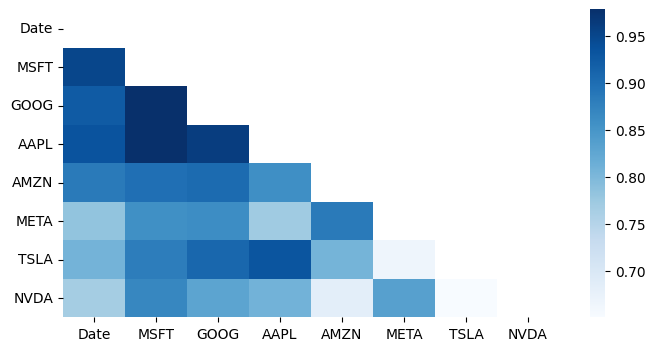

In [15]:
#Correlacion entre variables
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), mask = np.triu(df.corr()), cmap = 'Blues')

<Axes: >

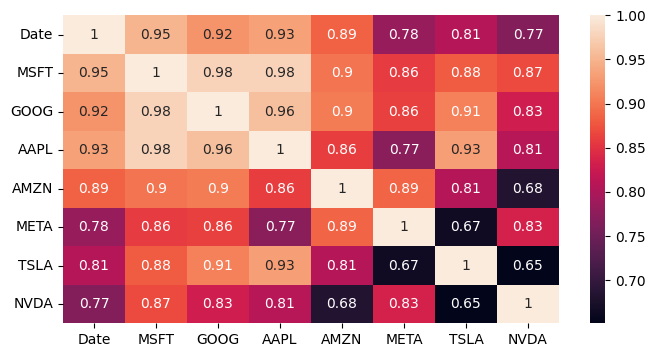

In [17]:
#Opcion 2
f, ax = plt.subplots(figsize = (8,4))
sns.heatmap(df.corr(), annot = True)

## Nulos

In [6]:
#Datos Nulos por columna
df.isnull()

,Date,MSFT,GOOG,AAPL,AMZN,META,TSLA,NVDA
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2512,False,False,False,False,False,False,False,False
2513,False,False,False,False,False,False,False,False
2514,False,False,False,False,False,False,False,False
2515,False,False,False,False,False,False,False,False


In [7]:
#Suma de Datos Nulos por columna
df.isnull().sum()

Date    0
MSFT    0
GOOG    0
AAPL    0
AMZN    0
META    0
TSLA    0
NVDA    0
dtype: int64

<Axes: >

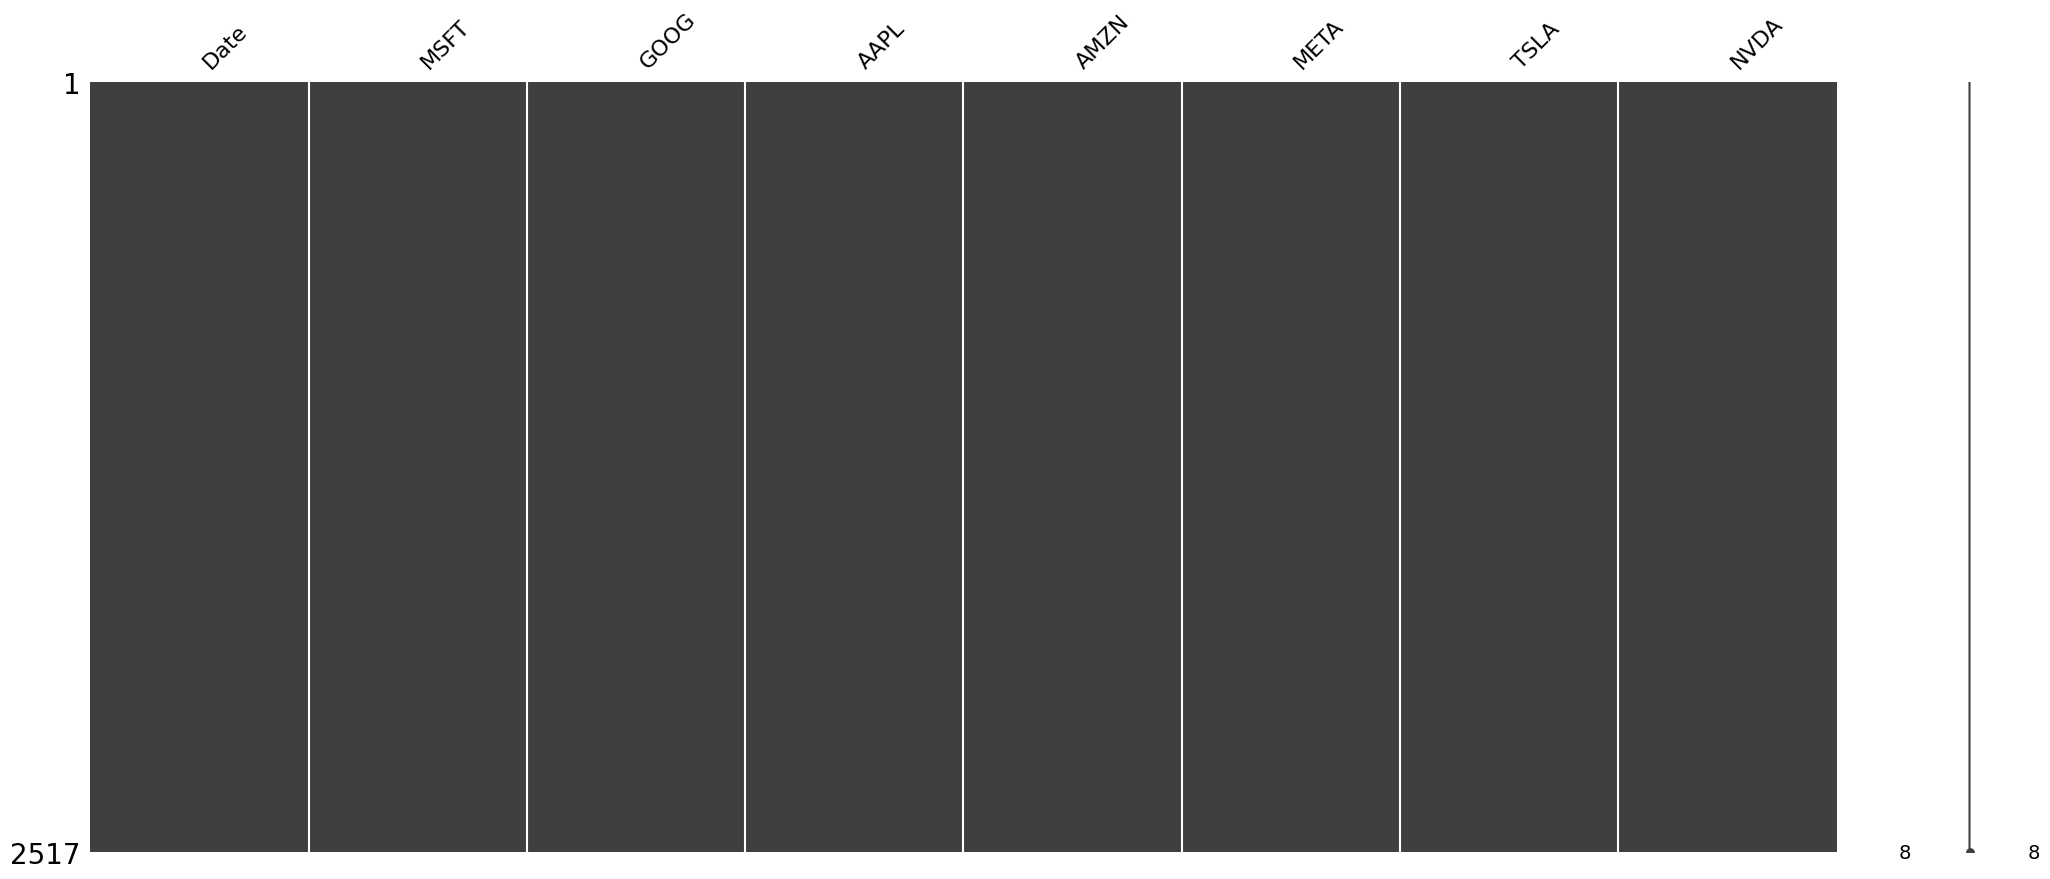

In [27]:
#Analizo Datos Nulos
!pip install missingno

import missingno as msno
#Matrix
msno.matrix(df)

## Duplicados

In [8]:
#Filas Duplicadas
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2512    False
2513    False
2514    False
2515    False
2516    False
Length: 2517, dtype: bool

In [10]:
#Suma de Filas Duplicadas
df.duplicated().sum()

0

In [11]:
#Expone cuantos valores unicos tiene cada Columna
df.nunique()

Date    2517
MSFT    2325
GOOG    2479
AAPL    2360
AMZN    2477
META    2390
TSLA    2455
NVDA    2380
dtype: int64

## Outliers

<Axes: >

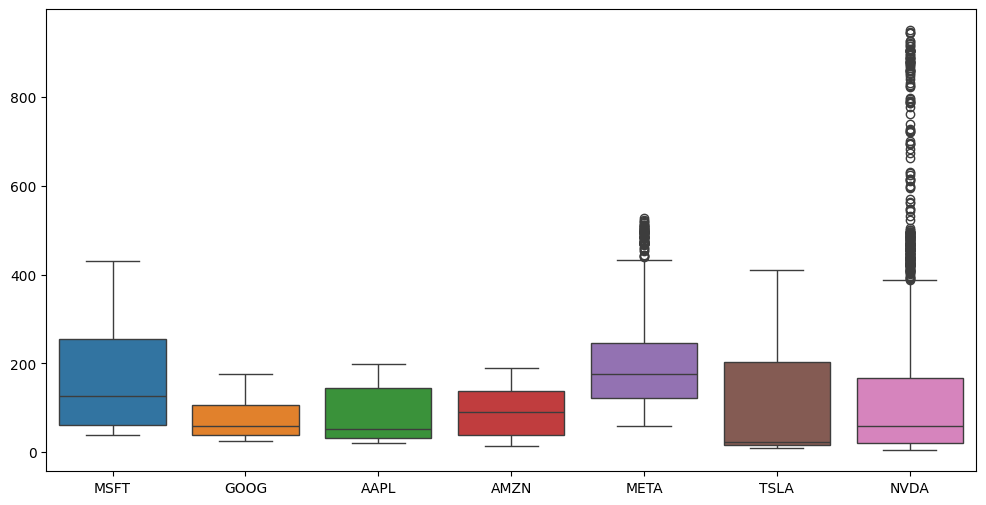

In [28]:
# Con atipicos
plt.figure(figsize=(12,6))
sns.boxplot(data=df)

<Axes: >

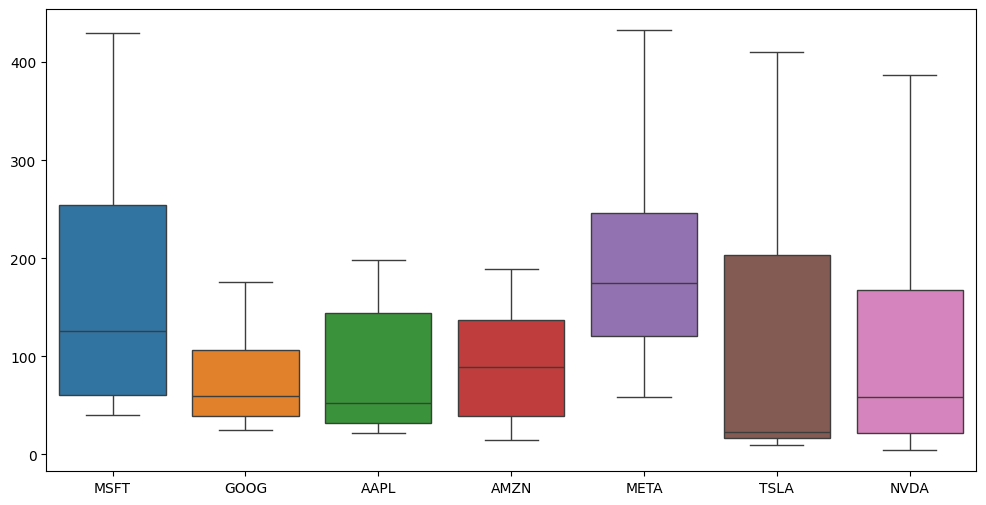

In [29]:
# Sin atipicos
plt.figure(figsize=(12,6))
sns.boxplot(data=df, showfliers=False)

In [23]:
#Cargo el DataFrame como CSV
ruta= 'C:/Users/Sofia Medici/Desktop/DATA/Py Notebooks/Entregables/Entregable2_Santiago_Hourcade.csv'
df.to_csv(ruta, index=False)

## Insights

**Correlacion**: La correlacion positiva mas significativa que se observa (0.98) se da entre Microsoft y Apple y entre Microsoft y Google. La correlacion negativa mas significativa que se observa (0.65) se da entre Tesla y Nvidia dos acciones sumanente volatiles
**Nulos**: No se detectaron
**Duplicados**: No se detectaron
**Outliers**: Se observan muchos Outliers en Nvidia lo cual resulta logico por ser una accion sumamente volatil. En menor medida tambien se obsrvan otliers en Meta tambien debido a su volatilidad. Llama la atencion que no se observen outliers en la accion de Tesla, no obstante el grafico de cajas nos expone que su mediana se encuentra muy cercana al primer cuartil lo que muestra la volatilidad en al distribucion de los precios.

# 3) Cargo la tabla a Redshift

In [27]:
#2.1) Creando la conexión a Redsshift
import psycopg2
host="data-engineer-cluster.cyhh5bfevlmn.us-east-1.redshift.amazonaws.com"
data_base="data-engineer-database"
user="cpn_santiago_hourcade_coderhouse"
with open("pwd_redshift.txt",'r') as f:
    pwd= f.read()
try:
    conn = psycopg2.connect(
        host=host,
        dbname=data_base,
        user=user,
        password=pwd,
        port='5439'
    )
    print("Conectado a Redshift con éxito!")
    
except Exception as e:
    print("No es posible conectar a Redshift")
    print(e)


Conectado a Redshift con éxito!


In [28]:
#2.2) Crear la tabla si no existe
with conn.cursor() as cur:
    cur.execute("""
        CREATE TABLE IF NOT EXISTS cpn_santiago_hourcade_coderhouse.siete_magnificas
        (
        Date DATE PRIMARY KEY,
        MSFT VARCHAR(100),
        GOOG VARCHAR(100),
        AAPL VARCHAR(100),
        AMZN VARCHAR(100),
        META VARCHAR(100),
        TSLA VARCHAR(100),
        NVDA VARCHAR(100)     
        )
    """)
    conn.commit()

In [29]:
#2.2.1) Vaciar la tabla para evitar duplicados o inconsistencias
with conn.cursor() as cur:
  cur.execute("Truncate table siete_magnificas")
  count = cur.rowcount


In [30]:
#2.2.2) Consultando que la tabla este vacia
cur = conn.cursor()
cur.execute("SELECT * FROM cpn_santiago_hourcade_coderhouse.siete_magnificas")
results = cur.fetchall()
print(results)


[]


In [31]:
#2.3) Insertando los datos en Redsfhift
from psycopg2.extras import execute_values
with conn.cursor() as cur:
    execute_values(
        cur,
        '''
        INSERT INTO siete_magnificas (Date, MSFT, GOOG, AAPL, AMZN, META, TSLA, NVDA)
        VALUES %s
        ''',
        [tuple(row) for row in df.values],
        page_size=len(df)
    )
    conn.commit()

In [32]:
#2.4) Consultando los registros cargados en la tabla
cur = conn.cursor()
cur.execute("SELECT * FROM cpn_santiago_hourcade_coderhouse.siete_magnificas")
results = cur.fetchall()
print(results)


[(datetime.date(2014, 5, 7), '39.41999816894531', '25.428186416625977', '21.15464210510254', '14.635499954223633', '57.38999938964844', '13.423333168029785', '4.567500114440918'), (datetime.date(2014, 5, 8), '39.63999938964844', '25.480045318603516', '20.999643325805664', '14.416000366210938', '56.7599983215332', '11.906000137329102', '4.625'), (datetime.date(2014, 5, 9), '39.540000915527344', '25.86548614501953', '20.91214370727539', '14.612000465393066', '57.2400016784668', '12.150667190551758', '4.512499809265137'), (datetime.date(2014, 5, 12), '39.970001220703125', '26.42345428466797', '21.172500610351562', '15.142999649047852', '59.83000183105469', '12.311332702636719', '4.644999980926514'), (datetime.date(2014, 5, 13), '40.41999816894531', '26.581520080566406', '21.205713272094727', '15.232000350952148', '59.83000183105469', '12.677332878112793', '4.570000171661377'), (datetime.date(2014, 5, 14), '40.2400016784668', '26.26040267944336', '21.20964241027832', '14.880999565124512', 

In [33]:
#2.5) Cierro Conexion
conn.close()
cur.close()